In [13]:
from sympy import symbols, init_printing
init_printing()
from celmech.hamiltonian import HamiltonianPoincare
from celmech.transformations import poincare_vars_from_sim

In [14]:
import rebound
import numpy as np

def make_sim(j, k):
    mass = 1.e-5
    e0 = 1.e-4 # initial eccentricity of planets
    
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=mass, e=e0, P=1.)
    sim.add(m=mass, e=e0, P=j/float(j-k))
    sim.add(m=mass, e=e0, P=5.)
    sim.move_to_com()
    return sim

j=3
k=2
sim = make_sim(j,k)

In [15]:
Hsim = HamiltonianPoincare()

In [16]:
Hsim.initialize_from_sim(sim)

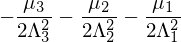

In [17]:
Hsim.H

In [18]:
Hsim.add_all_resonance_subterms(1,2,j,k)

In [19]:
Hsim.Lambda

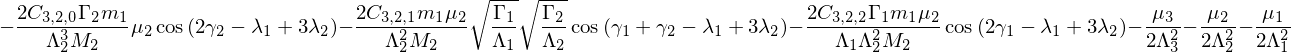

In [20]:
Hsim.H

In [21]:
Norbits = 300
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

Nsol = np.zeros((12, Nout))
symsol = np.zeros((12, Nout))
for i, time in enumerate(times):
    sim.integrate(time)
    Hsim.integrate(time)
    Nsol[:,i] = poincare_vars_from_sim(sim)
    symsol[:,i] = list(Hsim.integrator.y)

In [22]:
Hsim.Nderivs[0](*Hsim.integrator.y)

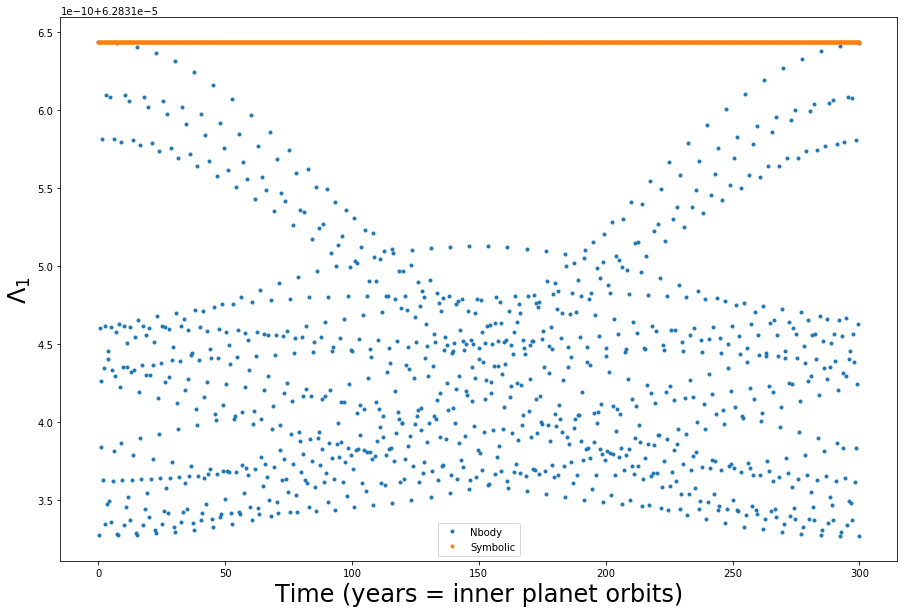

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Time (years = inner planet orbits)", fontsize=24)
ax.set_ylabel(r"$\Lambda_1$", fontsize=24)

ax.plot(times, Nsol[0,:], '.', label='Nbody')
ax.plot(times, symsol[0,:], '.', label='Symbolic')

ax.legend()

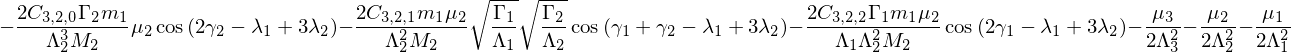

In [24]:
Hsim.H